# Covid19 - Death Toll Prediction
Coronavirus disease 2019 (COVID-19) time series listing confirmed cases, reported deaths, and reported recoveries. Data is disaggregated by country (and sometimes subregion). Coronavirus disease (COVID-19) is caused by Severe acute respiratory syndrome Coronavirus 2 (SARS-CoV-2) and has had a worldwide effect. On March 11, 2020, the World Health Organization (WHO) declared it a pandemic, pointing to the over 118,000 cases of the coronavirus illness in over 110 countries and territories around the world at the time.

## About The Data
This dataset includes time-series data tracking the number of people affected by COVID-19 worldwide, including:

- confirmed tested cases of Coronavirus infection
- the number of people who have reportedly died while sick with Coronavirus
- the number of people who have reportedly recovered from it

In [1]:
import pandas as pd 
import numpy as np

df = pd.read_csv(r'C:\Users\User\Desktop\Projects\aggregate_covid_country.csv', parse_dates=['Date'])
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [ ]:
df.shape

In [ ]:
df.describe()

In [ ]:
df.describe(include=['O'])

There are 188 distinct countries considered in this dataset

# EDA

In [2]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Grouping different types of cases as per the date
datewise = df.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise["Days Since"]=datewise.index-datewise.index.min()

In [4]:
print("Basic Information")
print("Totol number of countries with Disease Spread: ",len(df["Country"].unique()))
print("Total number of Confirmed Cases around the World: ",datewise["Confirmed"].iloc[-1])
print("Total number of Recovered Cases around the World: ",datewise["Recovered"].iloc[-1])
print("Total number of Deaths Cases around the World: ",datewise["Deaths"].iloc[-1])
print("Total number of Active Cases around the World: ",(datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1]))
print("Total number of Closed Cases around the World: ",datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1])

Basic Information
Totol number of countries with Disease Spread:  188
Total number of Confirmed Cases around the World:  5589626
Total number of Recovered Cases around the World:  2286956
Total number of Deaths Cases around the World:  350453
Total number of Active Cases around the World:  2952217
Total number of Closed Cases around the World:  2637409


In [5]:
datewise["WeekOfYear"]=datewise.index.weekofyear

week_num=[]
weekwise_confirmed=[]
weekwise_recovered=[]
weekwise_deaths=[]
w=1
for i in list(datewise["WeekOfYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekOfYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekOfYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekOfYear"]==i]["Deaths"].iloc[-1])
    week_num.append(w)
    w=w+1

In [6]:
#Calculating countrywise Moratality and Recovery Rate
countrywise=df[df["Date"]==df["Date"].max()].groupby(["Country"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'}).sort_values(["Confirmed"],ascending=False)
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Confirmed"])*100
countrywise["Recovery"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100

In [7]:
grouped_country=df.groupby(["Country","Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [8]:
grouped_country["Active Cases"]=grouped_country["Confirmed"]-grouped_country["Recovered"]-grouped_country["Deaths"]
grouped_country["log_confirmed"]=np.log(grouped_country["Confirmed"])
grouped_country["log_active"]=np.log(grouped_country["Active Cases"])

C:\Users\User\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Top 15 countries as per Number of Death Cases')

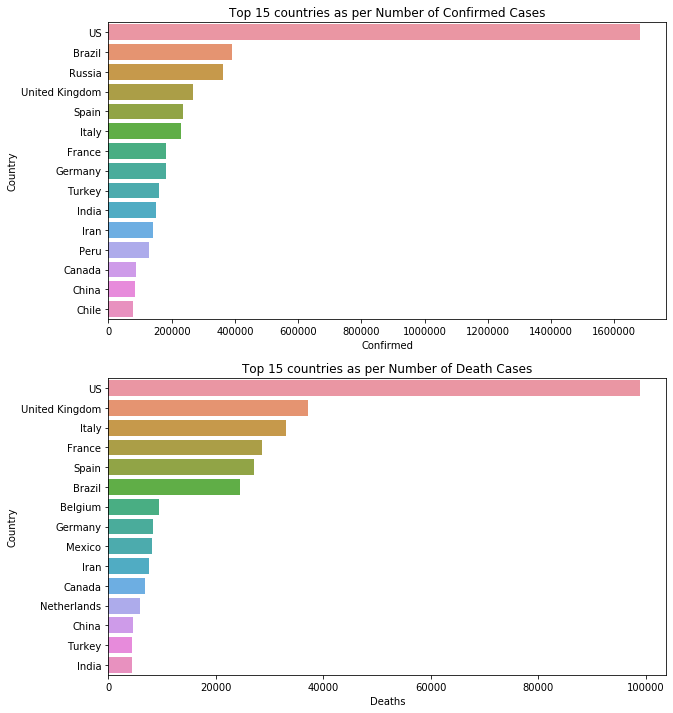

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,12))
top_15_confirmed=countrywise.sort_values(["Confirmed"],ascending=False).head(15)
top_15_deaths=countrywise.sort_values(["Deaths"],ascending=False).head(15)
sns.barplot(x=top_15_confirmed["Confirmed"],y=top_15_confirmed.index,ax=ax1)
ax1.set_title("Top 15 countries as per Number of Confirmed Cases")
sns.barplot(x=top_15_deaths["Deaths"],y=top_15_deaths.index,ax=ax2)
ax2.set_title("Top 15 countries as per Number of Death Cases")

Text(0.5, 0, 'Recovery (in Percentage)')

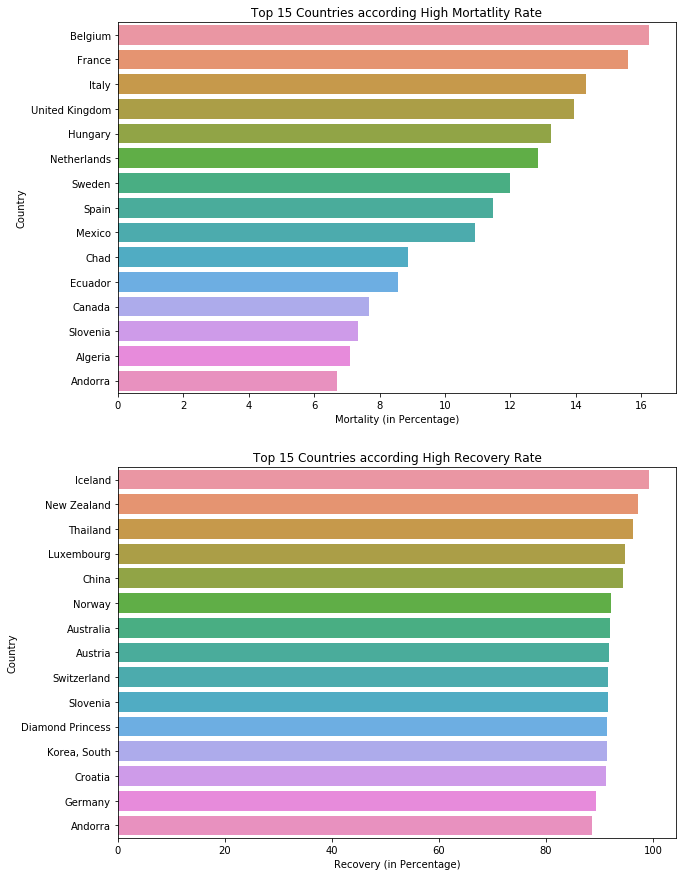

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
countrywise_plot_mortal=countrywise[countrywise["Confirmed"]>500].sort_values(["Mortality"],ascending=False).head(15)
sns.barplot(x=countrywise_plot_mortal["Mortality"],y=countrywise_plot_mortal.index,ax=ax1)
ax1.set_title("Top 15 Countries according High Mortatlity Rate")
ax1.set_xlabel("Mortality (in Percentage)")
countrywise_plot_recover=countrywise[countrywise["Confirmed"]>500].sort_values(["Recovery"],ascending=False).head(15)
sns.barplot(x=countrywise_plot_recover["Recovery"],y=countrywise_plot_recover.index, ax=ax2)
ax2.set_title("Top 15 Countries according High Recovery Rate")
ax2.set_xlabel("Recovery (in Percentage)")

Text(0.5, 0, 'Recovery (in Percentage)')

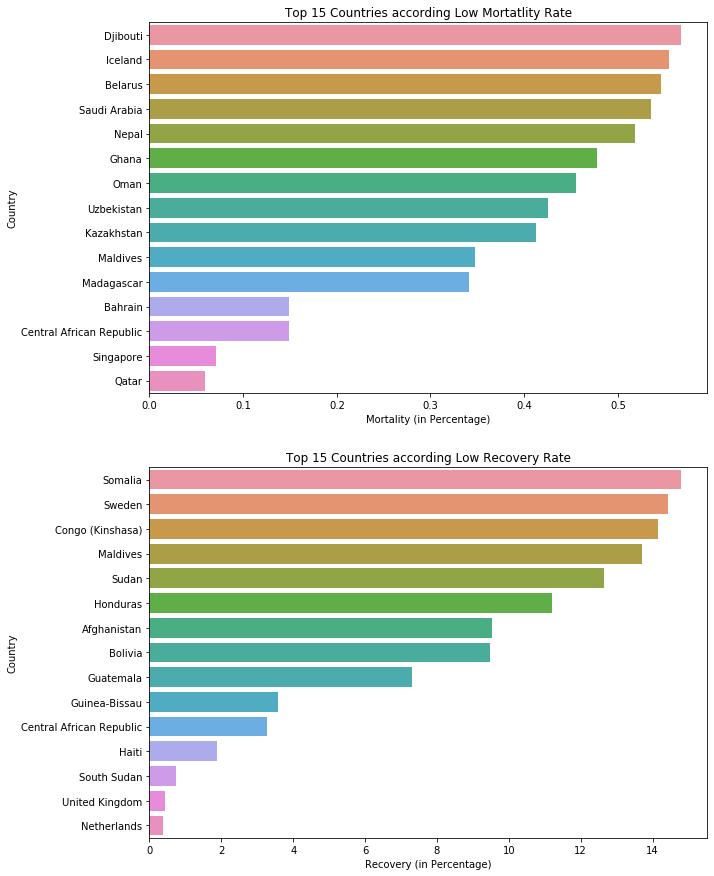

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
countrywise_plot_mortal=countrywise[countrywise["Confirmed"]>500].sort_values(["Mortality"],ascending=False).tail(15)
sns.barplot(x=countrywise_plot_mortal["Mortality"],y=countrywise_plot_mortal.index,ax=ax1)
ax1.set_title("Top 15 Countries according Low Mortatlity Rate")
ax1.set_xlabel("Mortality (in Percentage)")
countrywise_plot_recover=countrywise[countrywise["Confirmed"]>500].sort_values(["Recovery"],ascending=False).tail(15)
sns.barplot(x=countrywise_plot_recover["Recovery"],y=countrywise_plot_recover.index, ax=ax2)
ax2.set_title("Top 15 Countries according Low Recovery Rate")
ax2.set_xlabel("Recovery (in Percentage)")

Text(0.5, 1.0, 'Top 15 Countries with Most Number of Closed Cases')

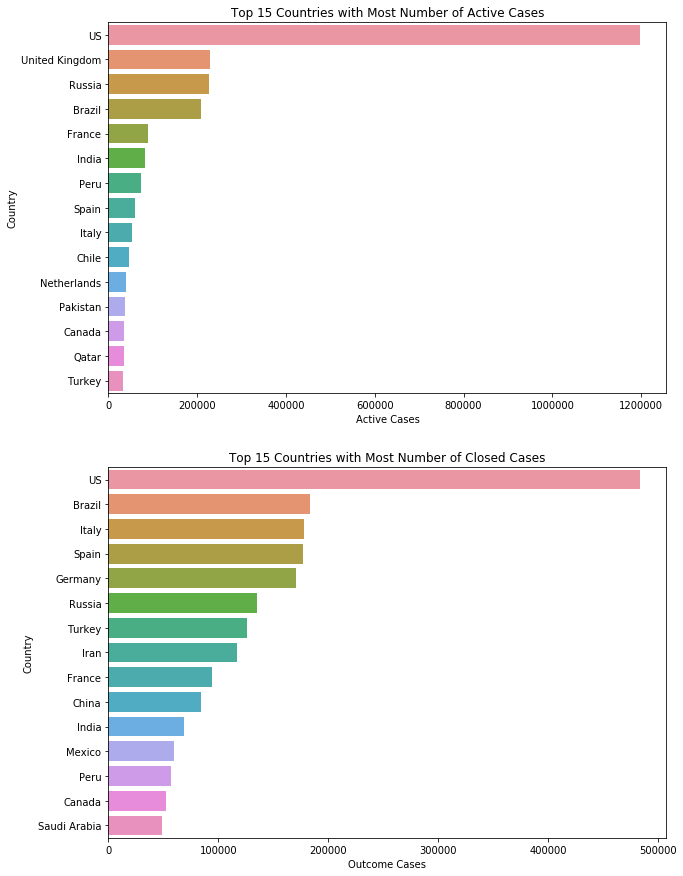

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
countrywise["Active Cases"]=(countrywise["Confirmed"]-countrywise["Recovered"]-countrywise["Deaths"])
countrywise["Outcome Cases"]=(countrywise["Recovered"]+countrywise["Deaths"])
top_15_active=countrywise.sort_values(["Active Cases"],ascending=False).head(15)
top_15_outcome=countrywise.sort_values(["Outcome Cases"],ascending=False).head(15)
sns.barplot(x=top_15_active["Active Cases"],y=top_15_active.index,ax=ax1)
sns.barplot(x=top_15_outcome["Outcome Cases"],y=top_15_outcome.index,ax=ax2)
ax1.set_title("Top 15 Countries with Most Number of Active Cases")
ax2.set_title("Top 15 Countries with Most Number of Closed Cases")

In [13]:
country_date=df.groupby(["Country","Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
confirm_rate=[]
for country in countrywise.index:
    days=country_date.loc[country].shape[0]
    confirm_rate.append((countrywise.loc[country]["Confirmed"])/days)
countrywise["Confirm Cases/Day"]=confirm_rate

Text(0.5, 1.0, 'Top 15 countries as per Lowest Confirmed Cases per Day having more than 1000 Confirmed Cases')

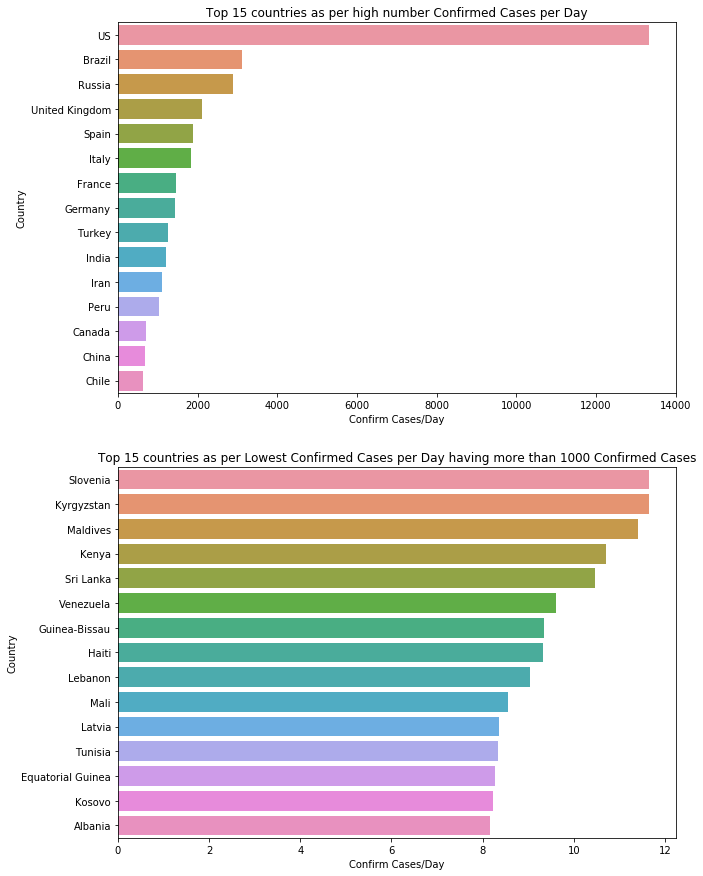

In [14]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
top_15_ccpd=countrywise.sort_values(["Confirm Cases/Day"],ascending=False).head(15)
sns.barplot(y=top_15_ccpd.index,x=top_15_ccpd["Confirm Cases/Day"],ax=ax1)
ax1.set_title("Top 15 countries as per high number Confirmed Cases per Day")
bottom_15_ccpd=countrywise[countrywise["Confirmed"]>1000].sort_values(["Confirm Cases/Day"],ascending=False).tail(15)
sns.barplot(y=bottom_15_ccpd.index,x=bottom_15_ccpd["Confirm Cases/Day"],ax=ax2)
ax2.set_title("Top 15 countries as per Lowest Confirmed Cases per Day having more than 1000 Confirmed Cases")

Mean Survival Probability across all countries 96.33809553197375
Median Survival Probability across all countries 97.21694127587662
Mean Death Probability across all countries 3.6619044680262505
Median Death Probability across all countries 2.7830587241233786


Text(0.5, 1.0, 'Bottom 15 Countries as per Survival Probability')

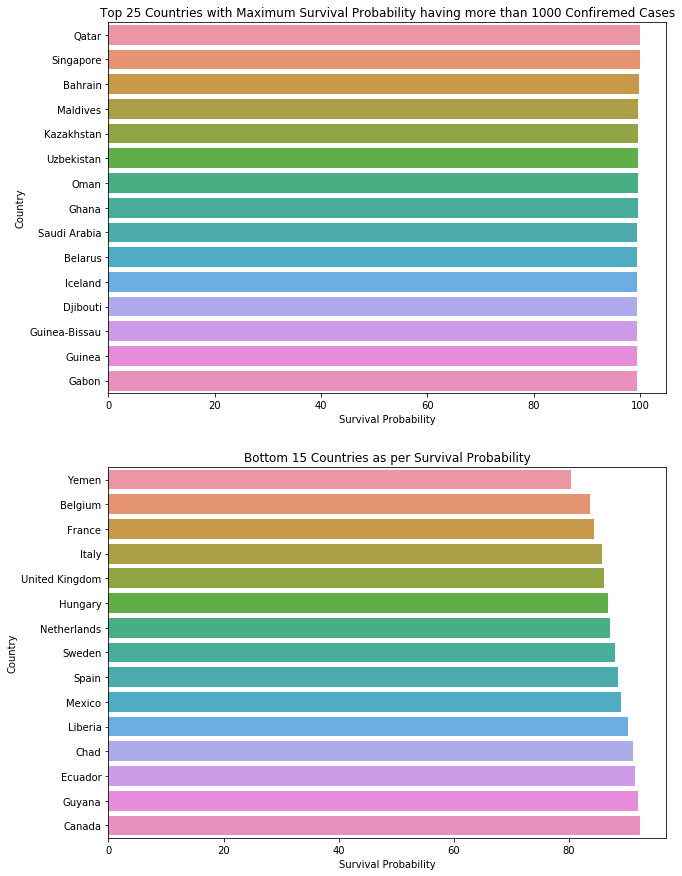

In [15]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
countrywise["Survival Probability"]=(1-(countrywise["Deaths"]/countrywise["Confirmed"]))*100
top_25_survival=countrywise[countrywise["Confirmed"]>1000].sort_values(["Survival Probability"],ascending=False).head(15)
sns.barplot(x=top_25_survival["Survival Probability"],y=top_25_survival.index,ax=ax1)
ax1.set_title("Top 25 Countries with Maximum Survival Probability having more than 1000 Confiremed Cases")
print('Mean Survival Probability across all countries',countrywise["Survival Probability"].mean())
print('Median Survival Probability across all countries',countrywise["Survival Probability"].median())
print('Mean Death Probability across all countries',100-countrywise["Survival Probability"].mean())
print('Median Death Probability across all countries',100-countrywise["Survival Probability"].median())

Bottom_5_countries=countrywise[countrywise["Confirmed"]>100].sort_values(["Survival Probability"],ascending=True).head(15)
sns.barplot(x=Bottom_5_countries["Survival Probability"],y=Bottom_5_countries.index,ax=ax2)
plt.title("Bottom 15 Countries as per Survival Probability")

# Feature Engineering

In [16]:
df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

The data does not have any null values

In [17]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


Splitting the Date column into 3 different columns for better analysis

In [18]:
df1 = pd.DataFrame()
df1['Date']=df['Date'].dt.day
df1['Month']=df['Date'].dt.month_name()
df1['Year']=df['Date'].dt.year
df1['Country']=df['Country']
df1['Confirmed']=df['Confirmed']
df1['Recovered']=df['Recovered']
df1['Deaths']=df['Deaths']
df1.shape

(23688, 7)

In [19]:
df1.head()

,Date,Month,Year,Country,Confirmed,Recovered,Deaths
0,22,January,2020,Afghanistan,0,0,0
1,22,January,2020,Albania,0,0,0
2,22,January,2020,Algeria,0,0,0
3,22,January,2020,Andorra,0,0,0
4,22,January,2020,Angola,0,0,0


In [20]:
df1 = df1.drop(['Year'], axis=1)

In [21]:
df1.head()

,Date,Month,Country,Confirmed,Recovered,Deaths
0,22,January,Afghanistan,0,0,0
1,22,January,Albania,0,0,0
2,22,January,Algeria,0,0,0
3,22,January,Andorra,0,0,0
4,22,January,Angola,0,0,0


#### Encoding categorical columns

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(df1['Month'])
df1['Month']=le.transform(df1['Month'])
le.fit(df1['Country'])
df1['Country']=le.transform(df1['Country'])

In [23]:
df1.head()

,Date,Month,Country,Confirmed,Recovered,Deaths
0,22,2,0,0,0,0
1,22,2,1,0,0,0
2,22,2,2,0,0,0
3,22,2,3,0,0,0
4,22,2,4,0,0,0


#### Checking for skewness

In [24]:
df1.skew()

Date         -0.068932
Month         0.024769
Country       0.000000
Confirmed    18.674502
Recovered    10.662286
Deaths       14.218167
dtype: float64

The column Confirmed, Recovered and Deaths are Highly skewed (Right), they need to be treated

In [25]:
for col in df1.columns:
    if df1.skew().loc[col]>1.0:
        df1[col]=np.log1p(df1[col])

In [26]:
df1.skew()

Date        -0.068932
Month        0.024769
Country      0.000000
Confirmed    0.538470
Recovered    1.011590
Deaths       1.598833
dtype: float64

#### Checking for Correlation among variables

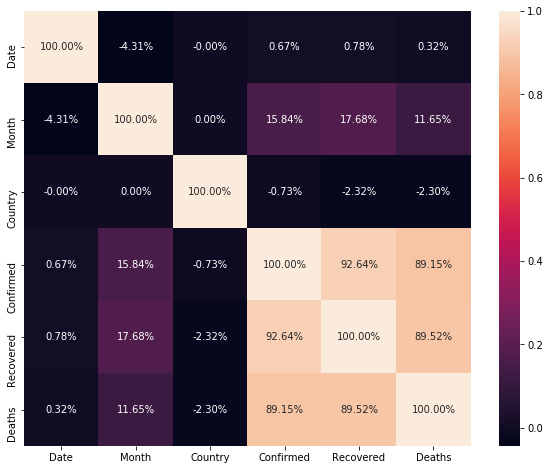

In [27]:
corrs=df1.dropna().corr()
plt.figure(figsize=(10,8))
sns.heatmap(corrs,annot=True,fmt='.2%')

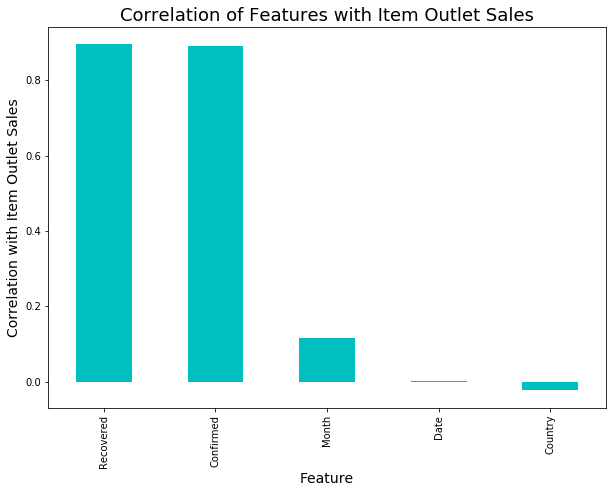

In [28]:
plt.figure(figsize=(10,7))
df1.corr()['Deaths'].sort_values(ascending=False).drop(['Deaths']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Correlation with Item Outlet Sales',fontsize=14)
plt.title('Correlation of Features with Item Outlet Sales',fontsize=18)
plt.show()

Since none of the variables behave very negatively with the target variable, none of the columns need to be dropped

#### Splitting the data

In [29]:
x = df1.drop(columns=['Deaths'])
y = df1[['Deaths']]

#### Scaling the data
Since the column Confirmed, Recovered and Death have entries which are very high however columns like date, month and country are very small.

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

# Model Building

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=.20,random_state=55)

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = r_state, test_size=0.20)
    regr = linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print('max r2 score corresponding to', final_r_state, 'is', max_r_score)

max r2 score corresponding to 94 is 0.8377804187814342


In [33]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=.20,random_state=94)

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [35]:
import warnings
warnings.filterwarnings('ignore')

## Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)
lm.score(x_train, y_train)
pred_linear = lm.predict(x_test)

lms = r2_score(y_test,pred_linear)
print('R2 Score:',lms*100)

lmscore = cross_val_score(lm,x,y,cv=5)
lmc = lmscore.mean() 
print('Cross Val Score:',lmc*100)

R2 Score: 83.77804187814341
Cross Val Score: 24.541824920453166


In [37]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_linear))
print('Mean Squared Error:',mean_squared_error(y_test,pred_linear))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_linear)))

Error:
Mean Absolute Error: 0.7224765737332501
Mean Squared Error: 0.9480533679246399
Root Mean Square Error: 0.9736803212166917


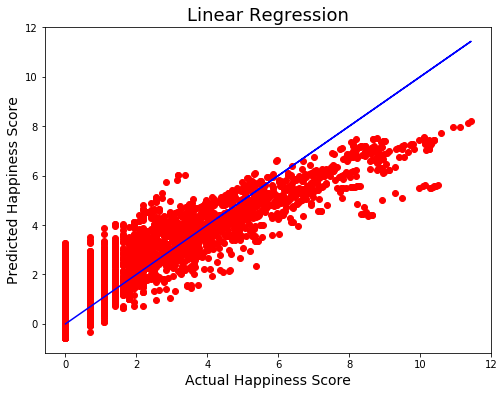

In [39]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_linear, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

## Lasso Regression

In [40]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10]}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001}


In [41]:
ls = Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

lss = r2_score(y_test,pred_ls)
print('R2 Score:',lss*100)

lsscore = cross_val_score(ls,x,y,cv=5)
lsc = lsscore.mean() 
print('Cross Val Score:',lsc*100)

R2 Score: 83.77792926848274
Cross Val Score: 24.519451458091062


In [42]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_ls))
print('Mean Squared Error:',mean_squared_error(y_test,pred_ls))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_ls)))

Error:
Mean Absolute Error: 0.722516547271858
Mean Squared Error: 0.9480599491257048
Root Mean Square Error: 0.973683700760008


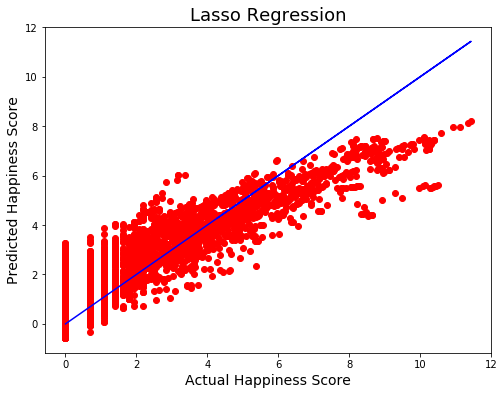

In [43]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_ls, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

## Ridge Regression

In [44]:
from sklearn.linear_model import Ridge

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10]}
rd = Lasso()
clf = GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001}


In [45]:
rd = Ridge(alpha=0.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred_rd = rd.predict(x_test)

rds = r2_score(y_test,pred_rd)
print('R2 Score:',rds*100)

rdscore = cross_val_score(rd,x,y,cv=5)
rdc = rdscore.mean() 
print('Cross Val Score:',rdc*100)

R2 Score: 83.77804187114036
Cross Val Score: 24.54182651057609


In [46]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rd))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_rd)))

Error:
Mean Absolute Error: 0.7224765727205098
Mean Squared Error: 0.948053368333916
Root Mean Square Error: 0.9736803214268613


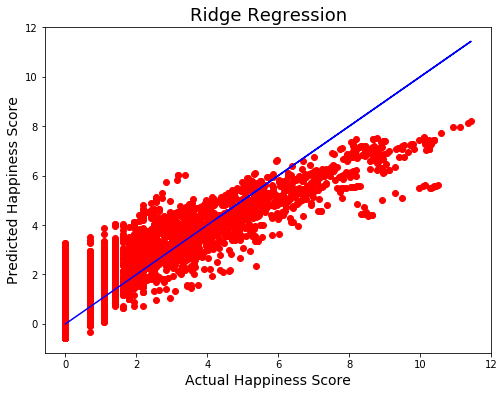

In [47]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_rd, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('Ridge Regression',fontsize=18)
plt.show()

## Decision Tree Regressor

In [48]:
from sklearn.tree import DecisionTreeRegressor

parameters = {'criterion':['mse', 'friedman_mse', 'mae'], 'splitter':['best', 'random']}
dt =DecisionTreeRegressor()
clf = GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'splitter': 'best'}


In [49]:
dt = DecisionTreeRegressor(criterion='mse', splitter='best')
dt.fit(x_train, y_train)
dt.score(x_train, y_train)
pred_decision = dt.predict(x_test)

dts = r2_score(y_test,pred_decision)
print('R2 Score:',dts*100)

dtscore = cross_val_score(dt,x,y,cv=5)
dtc = dtscore.mean() 
print('Cross Val Score:',dtc*100)

R2 Score: 98.2588159936922
Cross Val Score: 81.77041285267785


In [50]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_decision))
print('Mean Squared Error:',mean_squared_error(y_test,pred_decision))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_decision)))

Error:
Mean Absolute Error: 0.08568213275162088
Mean Squared Error: 0.10175931591960678
Root Mean Square Error: 0.3189973603646381


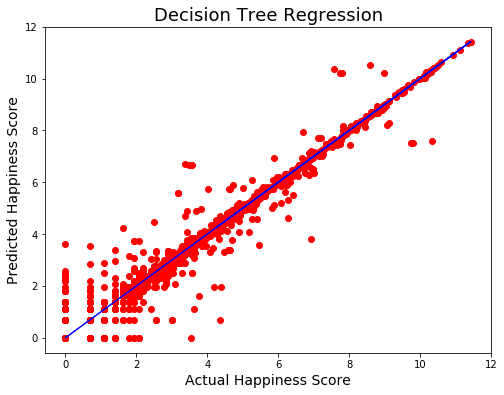

In [51]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_decision, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

## Random Forest Regressor

In [52]:
from sklearn.ensemble import RandomForestRegressor

parameters = {'n_estimators': [100,300,500]}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'n_estimators': 100}


In [53]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(x_train, y_train)
rf.score(x_train, y_train)
pred_random = rf.predict(x_test)

rfs = r2_score(y_test,pred_random)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=5)
rfc = rfscore.mean() 
print('Cross Val Score:',rfc*100)

R2 Score: 99.1213116218303
Cross Val Score: 89.8156322740816


In [54]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_random))
print('Mean Squared Error:',mean_squared_error(y_test,pred_random))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_random)))

Error:
Mean Absolute Error: 0.09661580037244524
Mean Squared Error: 0.05135283114543551
Root Mean Square Error: 0.22661163064908102


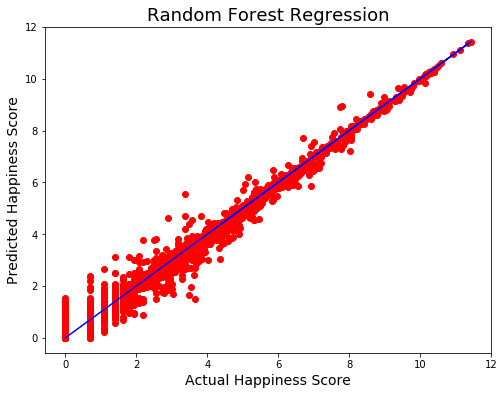

In [55]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_random, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('Random Forest Regression',fontsize=18)
plt.show()

## SVM Regressor

In [56]:
from sklearn.svm import SVR

parameters = {'gamma': ['auto', 'scale']} #'kernel': ['linear', 'poly','rbf', 'sigmoid']
sv = SVR()
clf = GridSearchCV(sv,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'gamma': 'scale'}


In [57]:
sv = SVR(kernel = 'rbf', gamma = 'scale')
sv.fit(x_train, y_train)
sv.score(x_train, y_train)
pred_vector = sv.predict(x_test)

svs = r2_score(y_test,pred_vector)
print('R2 Score:',svs*100)

svscore = cross_val_score(sv,x,y,cv=5)
svc = svscore.mean() 
print('Cross Val Score:',svc*100)

R2 Score: 93.65439098594481
Cross Val Score: 87.39042610550065


In [58]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_vector))
print('Mean Squared Error:',mean_squared_error(y_test,pred_vector))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_vector)))

Error:
Mean Absolute Error: 0.365083188495676
Mean Squared Error: 0.3708538730107048
Root Mean Square Error: 0.6089777278445451


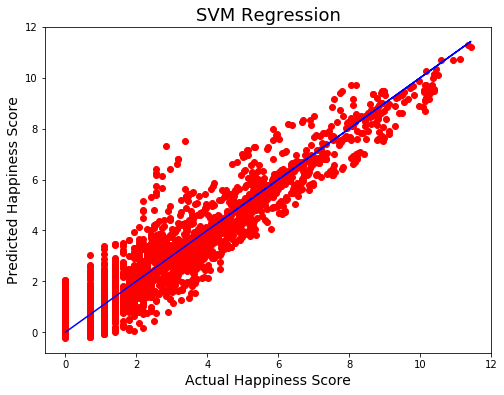

In [59]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_vector, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('SVM Regression',fontsize=18)
plt.show()

## GradientBoost Regressor

In [60]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(x_train, y_train)
gbr.score(x_train, y_train)
pred_gb = gbr.predict(x_test)

gbs = r2_score(y_test,pred_gb)
print('R2 Score:',gbs*100)

gbscore = cross_val_score(gbr,x,y,cv=5)
gbc = gbscore.mean() 
print('Cross Val Score:',gbc*100)

R2 Score: 95.3912897651129
Cross Val Score: 90.45861305870956


In [61]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_gb))
print('Mean Squared Error:',mean_squared_error(y_test,pred_gb))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_gb)))

Error:
Mean Absolute Error: 0.3305852847110262
Mean Squared Error: 0.2693449968956897
Root Mean Square Error: 0.5189845825221494


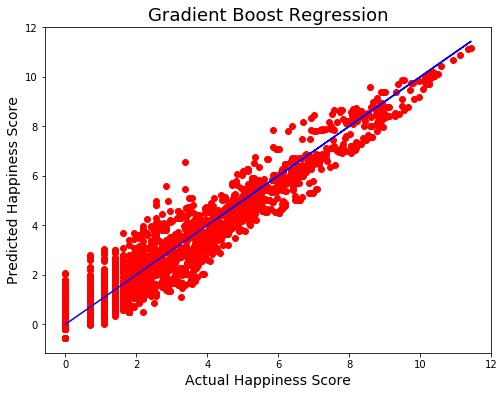

In [62]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_gb, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('Gradient Boost Regression',fontsize=18)
plt.show()

# Picking the best model

In [63]:
d1 = lms-lmc
d2 = lss-lsc
d3 = rds-rdc
d4 = dts-dtc
d5 = rfs-rfc
d6 = svs-svc
d7 = gbs-gbc

In [64]:
models = pd.DataFrame({
    'Model': ['Linear Regression','Lasso Regression', 'Ridge Regression', 
              'Decision Tree Regression','Random Forest Regression','SVM','Gradient Boost Regression'],
    'R2 Score': [lms*100, lss*100, rds*100, dts*100, rfs*100, svs*100, gbs*100],
    'Cross Val Score': [lmc*100, lsc*100, rdc*100, dtc*100, rfc*100, svc*100, gbc*100],
    'Difference': [d1*100, d2*100, d3*100, d4*100, d5*100, d6*100, d7*100] 
})
models.sort_values(by='Difference', ascending=True)

,Model,R2 Score,Cross Val Score,Difference
6,Gradient Boost Regression,95.391290,90.458613,4.932677
5,SVM,93.654391,87.390426,6.263965
4,Random Forest Regression,99.121312,89.815632,9.305679
3,Decision Tree Regression,98.258816,81.770413,16.488403
2,Ridge Regression,83.778042,24.541827,59.236215
0,Linear Regression,83.778042,24.541825,59.236217
1,Lasso Regression,83.777929,24.519451,59.258478


It can be seen that the GradientBoost Regression Model is fitting the data in the best way, Thus that is our best model

# Saving the best model

In [66]:
import pickle

filename = 'covid.pkl'
pickle.dump(gbr, open(filename, 'wb'))

# Load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

loaded_model.predict(x_test)

array([ 4.58804031e-02, -5.08747421e-02, -2.82463301e-02, ...,
        1.14878163e-03,  5.52387629e+00,  3.06764894e+00])